## ESTI019-17 - Codificação de Sinais Multimídia

### Roteiro 03 - Codificação por Transformada


### <font color='green'>Prof. Celso Kurashima</font>

### <font color='green'>Prof. Mario Minami</font>

### <font color='blue'><u>18 de outubro de 2019</u></font>



### Identificação do Aluno

#### Nome Completo

GABRIEL MESQUITA

RAPHAEL VACARI

RODRIGO HIROAKI

THIAGO HENRIQUE GOMES PANINI

WELLINGTON ARAUJO NOGUEIRA

#### RA

11057015

11074613

11042714

11016214

11075113

## <font color='blue'><u>**Atividades em Aula**</u></font>

1. No seu diretório **"Documentos"**, crie uma pasta com seu primeiro nome e uma sub-pasta **"lab3"**.

2. Dentro desta pasta, copie todos arquivos fornecidos, incluindo os programas e as imagens,

3. Entre no **jupyter notebook** e abra o arquivo de programa fornecido em python: **lab3_codif_image_v1.ipynb**.

4. Siga as instruções a seguir.

### <font color='red'>1: Separar os Canais nos Espaços de Cores<font>

* O código abaixo realiza a leitura de um arquivo de **imagem** e mostra nos espaços RGB, YCBCR, e HSV. Estude passo a passo os comandos.

### <font color='green'>**Considerações Importantes sobre Conversão entre espaços de cores**</font>

* Objetivo: entender os canais de uma imagem nos espaços de cores: **RGB**, **YCrCb**, **HSV**. 

* As imagens coloridas são lidas em **BGR** (Azul-Verde-Vermelho), devido ao padrão do OpenCV. 

* A função **imshow()** do OpenCV sempre assume que a Matriz mostrada está no espaço de cores BGR.

* O Matplotlib exibe no modo **RGB**. Portanto, as imagens não serão mostradas corretamente pelo Matplotlib se a imagem foi previamente lida pelo OpenCV. Procure no programa abaixo onde a mudança de BGR para RGB é realizada.

Resolução:  548  x  342  PIXELS.  3  camadas.


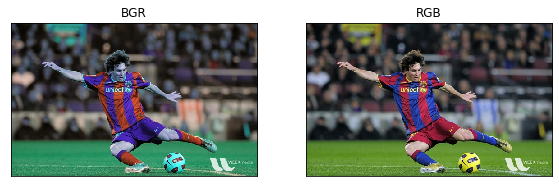

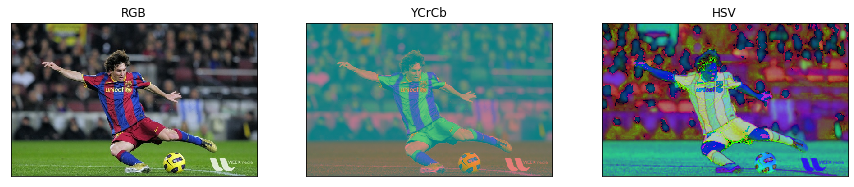

In [2]:
# Estude este código e Execute 
# (clique em "Run", com esta célula selecionada)
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt 
%matplotlib inline

bgr1 = cv.imread('messi5.jpg')  # ATENÇÃO, está no formato BGR
#bgr1 = cv.imread('lena.bmp') 
#bgr1 = cv.imread('peppers.png') 

altura,largura,camadas= bgr1.shape
print("Resolução: ", largura, " x ", altura, " PIXELS. ", camadas, " camadas.")

# separa os canais e re-arranja para formar imagem RGB
b1,g1,r1 = cv.split(bgr1)
rgb2 = cv.merge([r1,g1,b1])

# Imprime cores distorcidas (BGR) cores reais (RGB) lado a lado
plt.figure(figsize=(9.7, 3.6))
plt.subplot(121);plt.imshow(bgr1); plt.title('BGR'); plt.xticks([]), plt.yticks([])
plt.subplot(122);plt.imshow(rgb2); plt.title('RGB'); plt.xticks([]), plt.yticks([])
plt.show()

# Converte para o formato YCrCb e o formato HSV
ycrcb = cv.cvtColor(bgr1, cv.COLOR_BGR2YCrCb)
hsv = cv.cvtColor(bgr1, cv.COLOR_BGR2HSV)

# Imprime o formatos YCrCb e HSV ao lado das cores reais (RGB)
plt.figure(figsize=(15, 6))
plt.subplot(131);plt.imshow(rgb2); plt.title('RGB'); plt.xticks([]), plt.yticks([]) 
plt.subplot(132);plt.imshow(ycrcb); plt.title('YCrCb'); plt.xticks([]), plt.yticks([]) 
plt.subplot(133);plt.imshow(hsv); plt.title('HSV'); plt.xticks([]), plt.yticks([]) 
plt.show()

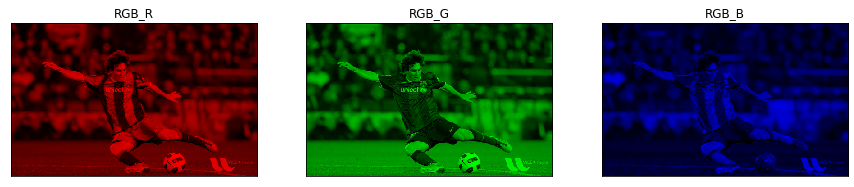

In [3]:
# Separação dos Canais RGB individualmente
# Estude este código e Execute

imageR = rgb2.copy()
imageR[:, :, 1:3] = 0
 
imageG = rgb2.copy()
imageG[:, :, [0, 2]] = 0
 
imageB = rgb2.copy()
imageB[:, :, 0:2] = 0

plt.figure(figsize=(15, 6))
plt.subplot(131);plt.imshow(imageR); plt.title('RGB_R'); plt.xticks([]), plt.yticks([]) 
plt.subplot(132);plt.imshow(imageG); plt.title('RGB_G'); plt.xticks([]), plt.yticks([]) 
plt.subplot(133);plt.imshow(imageB); plt.title('RGB_B'); plt.xticks([]), plt.yticks([]) 
plt.show()

O código acima suprime a intensidade dos pixels em colunas específicas, mantendo apenas uma única colocação por imagem. Em outras palavras, a indexação das imagens ocorre de forma a zerar as componentes referentes às cores indesejadas (R, G ou B). 

Por exemplo, no primeiro caso, é atribuído o valor zero à segunda e à terceira coluna de pixels, mantendo apenas números referentes a primeira coluna que, no caso, representa a cor vermelha.

Analogamente, este processo é repetido para as cores verdes (mantendo a segunda coluna e zerando todas as outras) e azul (mantendo a última coluna e zerando todas as outras). O resultado contempla imagens de coloração única, de acordo com a intensidade de pixels mantidas e sua respectiva coloração.

In [4]:
# Exemplo imagem vermelha com apenas a primeira coluna de intensidade de pixels preenchida
imageR[0]

array([[44,  0,  0],
       [47,  0,  0],
       [52,  0,  0],
       ...,
       [55,  0,  0],
       [53,  0,  0],
       [50,  0,  0]], dtype=uint8)

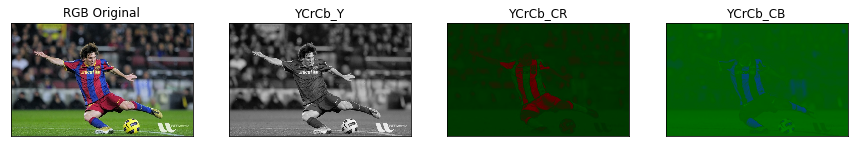

In [5]:
# Separação dos Canais YCbCr individualmente
# Estude este código e Execute

y1,cr1,cb1 = cv.split(ycrcb)

imageCR = ycrcb.copy()
y2 = imageCR[:, :, 0]
imageCR[:, :, 0] = 0
imageCR[:, :, 2] = 0
Cr =  cv.cvtColor(imageCR, cv.COLOR_YCrCb2RGB)

imageCB = ycrcb.copy()
imageCB[:, :, 0] = 0
imageCB[:, :, 1] = 0
Cb =  cv.cvtColor(imageCB, cv.COLOR_YCrCb2RGB)

plt.figure(figsize=(15, 5))
plt.subplot(141);plt.imshow(rgb2); plt.title('RGB Original'); plt.xticks([]), plt.yticks([]) 
plt.subplot(142);plt.imshow(y1, cmap='gray'); plt.title('YCrCb_Y'); plt.xticks([]), plt.yticks([]) 
plt.subplot(143);plt.imshow(Cr); plt.title('YCrCb_CR'); plt.xticks([]), plt.yticks([]) 
plt.subplot(144);plt.imshow(Cb); plt.title('YCrCb_CB'); plt.xticks([]), plt.yticks([]) 
plt.show()

### <font color='green'>**Atividade Requerida:**</font>

* Neste mesmo programa, teste também as imagens peppers e lena, trocando o comentário no programa.

* Observe a distorção visual quando as imagens YCrCb e HSV são plotadas, pois o comando imshow não faz re-conversão para RGB. 


### <font color='red'>1.1: Utilizando as imagens Peppers e Lena<font>

* O código abaixo realiza a leitura de um arquivo de **imagem** e mostra nos espaços RGB, YCBCR, e HSV. Estude passo a passo os comandos.

Resolução:  512  x  512  PIXELS.  3  camadas.


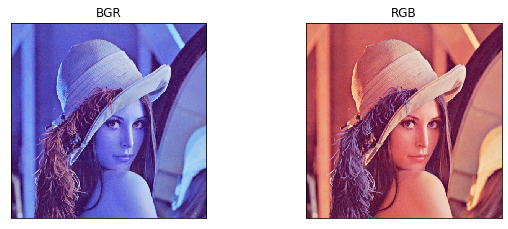

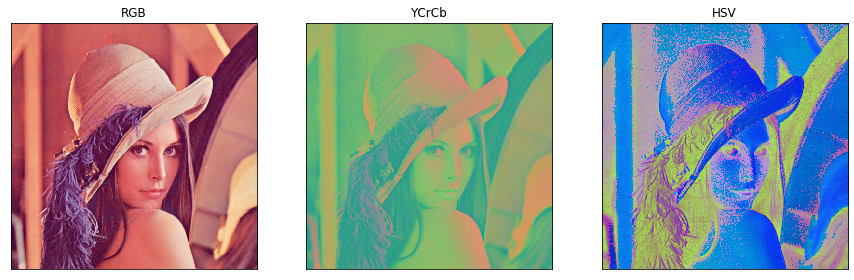

In [6]:
#bgr1 = cv.imread('messi5.jpg')  # ATENÇÃO, está no formato BGR
bgr1 = cv.imread('lena.bmp') 
#bgr1 = cv.imread('peppers.png') 

altura,largura,camadas= bgr1.shape
print("Resolução: ", largura, " x ", altura, " PIXELS. ", camadas, " camadas.")

# separa os canais e re-arranja para formar imagem RGB
b1,g1,r1 = cv.split(bgr1)
rgb2 = cv.merge([r1,g1,b1])

# Imprime cores distorcidas (BGR) cores reais (RGB) lado a lado
plt.figure(figsize=(9.7, 3.6))
plt.subplot(121);plt.imshow(bgr1); plt.title('BGR'); plt.xticks([]), plt.yticks([])
plt.subplot(122);plt.imshow(rgb2); plt.title('RGB'); plt.xticks([]), plt.yticks([])
plt.show()

# Converte para o formato YCrCb e o formato HSV
ycrcb = cv.cvtColor(bgr1, cv.COLOR_BGR2YCrCb)
hsv = cv.cvtColor(bgr1, cv.COLOR_BGR2HSV)

# Imprime o formatos YCrCb e HSV ao lado das cores reais (RGB)
plt.figure(figsize=(15, 6))
plt.subplot(131);plt.imshow(rgb2); plt.title('RGB'); plt.xticks([]), plt.yticks([]) 
plt.subplot(132);plt.imshow(ycrcb); plt.title('YCrCb'); plt.xticks([]), plt.yticks([]) 
plt.subplot(133);plt.imshow(hsv); plt.title('HSV'); plt.xticks([]), plt.yticks([]) 
plt.show()


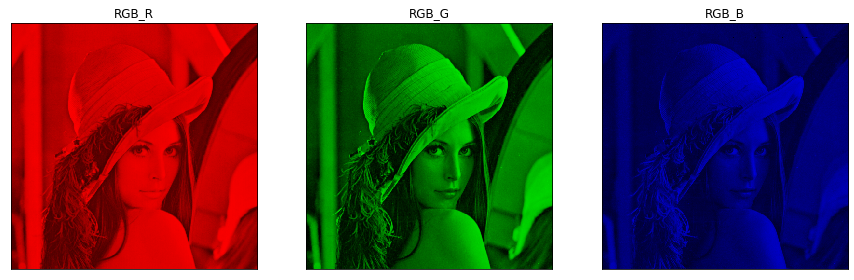

In [7]:
# Separação dos Canais RGB individualmente
# Estude este código e Execute

imageR = rgb2.copy()
imageR[:, :, 1:3] = 0
 
imageG = rgb2.copy()
imageG[:, :, [0, 2]] = 0
 
imageB = rgb2.copy()
imageB[:, :, 0:2] = 0

plt.figure(figsize=(15, 6))
plt.subplot(131);plt.imshow(imageR); plt.title('RGB_R'); plt.xticks([]), plt.yticks([]) 
plt.subplot(132);plt.imshow(imageG); plt.title('RGB_G'); plt.xticks([]), plt.yticks([]) 
plt.subplot(133);plt.imshow(imageB); plt.title('RGB_B'); plt.xticks([]), plt.yticks([])
plt.show()

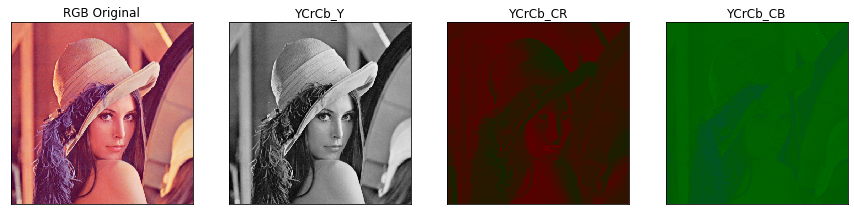

In [8]:
# Separação dos Canais YCbCr individualmente
# Estude este código e Execute

y1,cr1,cb1 = cv.split(ycrcb)

imageCR = ycrcb.copy()
y2 = imageCR[:, :, 0]
imageCR[:, :, 0] = 0
imageCR[:, :, 2] = 0
Cr =  cv.cvtColor(imageCR, cv.COLOR_YCrCb2RGB)

imageCB = ycrcb.copy()
imageCB[:, :, 0] = 0
imageCB[:, :, 1] = 0
Cb =  cv.cvtColor(imageCB, cv.COLOR_YCrCb2RGB)

plt.figure(figsize=(15, 5))
plt.subplot(141);plt.imshow(rgb2); plt.title('RGB Original'); plt.xticks([]), plt.yticks([]) 
plt.subplot(142);plt.imshow(y1, cmap='gray'); plt.title('YCrCb_Y'); plt.xticks([]), plt.yticks([]) 
plt.subplot(143);plt.imshow(Cr); plt.title('YCrCb_CR'); plt.xticks([]), plt.yticks([]) 
plt.subplot(144);plt.imshow(Cb); plt.title('YCrCb_CB'); plt.xticks([]), plt.yticks([]) 
plt.show()

Resolução:  512  x  384  PIXELS.  3  camadas.


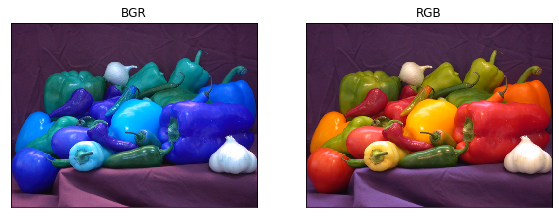

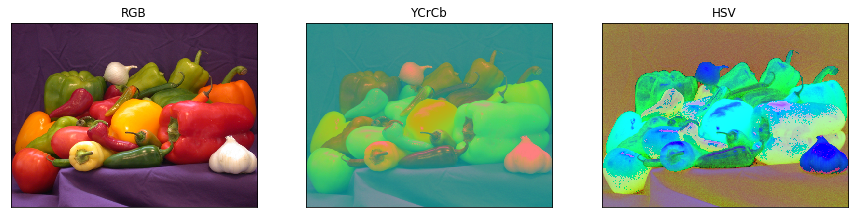

In [9]:
#bgr1 = cv.imread('messi5.jpg')  # ATENÇÃO, está no formato BGR
#bgr1 = cv.imread('lena.bmp') 
bgr1 = cv.imread('peppers.png') 

altura,largura,camadas= bgr1.shape
print("Resolução: ", largura, " x ", altura, " PIXELS. ", camadas, " camadas.")

# separa os canais e re-arranja para formar imagem RGB
b1,g1,r1 = cv.split(bgr1)
rgb2 = cv.merge([r1,g1,b1])

# Imprime cores distorcidas (BGR) cores reais (RGB) lado a lado
plt.figure(figsize=(9.7, 3.6))
plt.subplot(121);plt.imshow(bgr1); plt.title('BGR'); plt.xticks([]), plt.yticks([])
plt.subplot(122);plt.imshow(rgb2); plt.title('RGB'); plt.xticks([]), plt.yticks([])
plt.show()

# Converte para o formato YCrCb e o formato HSV
ycrcb = cv.cvtColor(bgr1, cv.COLOR_BGR2YCrCb)
hsv = cv.cvtColor(bgr1, cv.COLOR_BGR2HSV)

# Imprime o formatos YCrCb e HSV ao lado das cores reais (RGB)
plt.figure(figsize=(15, 6))
plt.subplot(131);plt.imshow(rgb2); plt.title('RGB'); plt.xticks([]), plt.yticks([]) 
plt.subplot(132);plt.imshow(ycrcb); plt.title('YCrCb'); plt.xticks([]), plt.yticks([]) 
plt.subplot(133);plt.imshow(hsv); plt.title('HSV'); plt.xticks([]), plt.yticks([]) 
plt.show()

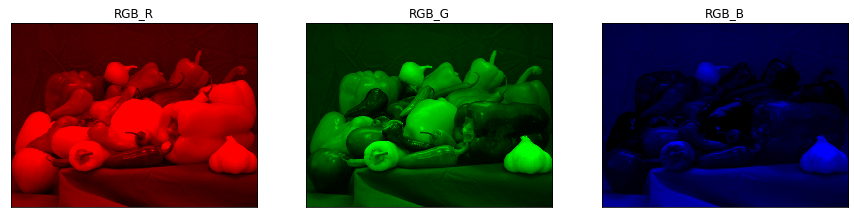

In [10]:
# Separação dos Canais RGB individualmente
# Estude este código e Execute

imageR = rgb2.copy()
imageR[:, :, 1:3] = 0
 
imageG = rgb2.copy()
imageG[:, :, [0, 2]] = 0
 
imageB = rgb2.copy()
imageB[:, :, 0:2] = 0

plt.figure(figsize=(15, 6))
plt.subplot(131);plt.imshow(imageR); plt.title('RGB_R'); plt.xticks([]), plt.yticks([]) 
plt.subplot(132);plt.imshow(imageG); plt.title('RGB_G'); plt.xticks([]), plt.yticks([]) 
plt.subplot(133);plt.imshow(imageB); plt.title('RGB_B'); plt.xticks([]), plt.yticks([]) 
plt.show()

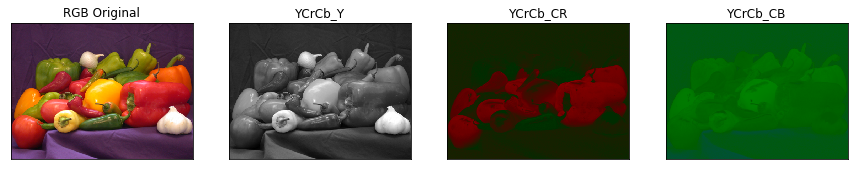

In [11]:
# Separação dos Canais YCbCr individualmente
# Estude este código e Execute

y1,cr1,cb1 = cv.split(ycrcb)

imageCR = ycrcb.copy()
y2 = imageCR[:, :, 0]
imageCR[:, :, 0] = 0
imageCR[:, :, 2] = 0
Cr =  cv.cvtColor(imageCR, cv.COLOR_YCrCb2RGB)

imageCB = ycrcb.copy()
imageCB[:, :, 0] = 0
imageCB[:, :, 1] = 0
Cb =  cv.cvtColor(imageCB, cv.COLOR_YCrCb2RGB)

plt.figure(figsize=(15, 5))
plt.subplot(141);plt.imshow(rgb2); plt.title('RGB Original'); plt.xticks([]), plt.yticks([]) 
plt.subplot(142);plt.imshow(y1, cmap='gray'); plt.title('YCrCb_Y'); plt.xticks([]), plt.yticks([]) 
plt.subplot(143);plt.imshow(Cr); plt.title('YCrCb_CR'); plt.xticks([]), plt.yticks([]) 
plt.subplot(144);plt.imshow(Cb); plt.title('YCrCb_CB'); plt.xticks([]), plt.yticks([]) 
plt.show()

Resolução:  1280  x  960  PIXELS.  3  camadas.


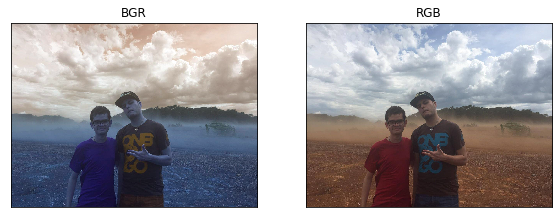

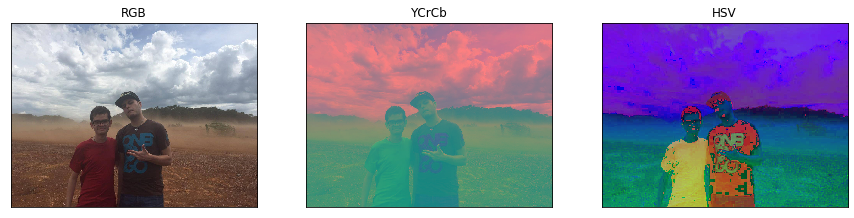

In [12]:
#bgr1 = cv.imread('messi5.jpg')  # ATENÇÃO, está no formato BGR
#bgr1 = cv.imread('lena.bmp') 
bgr1 = cv.imread('sandstorm.jpg') 

altura,largura,camadas= bgr1.shape
print("Resolução: ", largura, " x ", altura, " PIXELS. ", camadas, " camadas.")

# separa os canais e re-arranja para formar imagem RGB
b1,g1,r1 = cv.split(bgr1)
rgb2 = cv.merge([r1,g1,b1])

# Imprime cores distorcidas (BGR) cores reais (RGB) lado a lado
plt.figure(figsize=(9.7, 3.6))
plt.subplot(121);plt.imshow(bgr1); plt.title('BGR'); plt.xticks([]), plt.yticks([])
plt.subplot(122);plt.imshow(rgb2); plt.title('RGB'); plt.xticks([]), plt.yticks([])
plt.show()

# Converte para o formato YCrCb e o formato HSV
ycrcb = cv.cvtColor(bgr1, cv.COLOR_BGR2YCrCb)
hsv = cv.cvtColor(bgr1, cv.COLOR_BGR2HSV)

# Imprime o formatos YCrCb e HSV ao lado das cores reais (RGB)
plt.figure(figsize=(15, 6))
plt.subplot(131);plt.imshow(rgb2); plt.title('RGB'); plt.xticks([]), plt.yticks([]) 
plt.subplot(132);plt.imshow(ycrcb); plt.title('YCrCb'); plt.xticks([]), plt.yticks([]) 
plt.subplot(133);plt.imshow(hsv); plt.title('HSV'); plt.xticks([]), plt.yticks([]) 
plt.show()


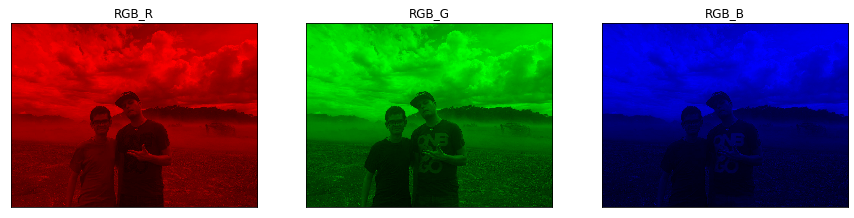

In [13]:
# Separação dos Canais RGB individualmente
# Estude este código e Execute

imageR = rgb2.copy()
imageR[:, :, 1:3] = 0
 
imageG = rgb2.copy()
imageG[:, :, [0, 2]] = 0
 
imageB = rgb2.copy()
imageB[:, :, 0:2] = 0

plt.figure(figsize=(15, 6))
plt.subplot(131);plt.imshow(imageR); plt.title('RGB_R'); plt.xticks([]), plt.yticks([]) 
plt.subplot(132);plt.imshow(imageG); plt.title('RGB_G'); plt.xticks([]), plt.yticks([]) 
plt.subplot(133);plt.imshow(imageB); plt.title('RGB_B'); plt.xticks([]), plt.yticks([]) 
plt.show()

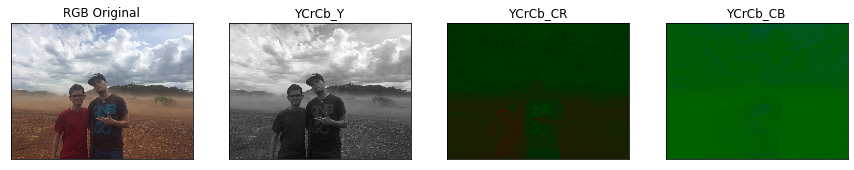

In [14]:
# Separação dos Canais YCbCr individualmente
# Estude este código e Execute

y1,cr1,cb1 = cv.split(ycrcb)

imageCR = ycrcb.copy()
y2 = imageCR[:, :, 0]
imageCR[:, :, 0] = 0
imageCR[:, :, 2] = 0
Cr =  cv.cvtColor(imageCR, cv.COLOR_YCrCb2RGB)

imageCB = ycrcb.copy()
imageCB[:, :, 0] = 0
imageCB[:, :, 1] = 0
Cb =  cv.cvtColor(imageCB, cv.COLOR_YCrCb2RGB)

plt.figure(figsize=(15, 5))
plt.subplot(141);plt.imshow(rgb2); plt.title('RGB Original'); plt.xticks([]), plt.yticks([]) 
plt.subplot(142);plt.imshow(y1, cmap='gray'); plt.title('YCrCb_Y'); plt.xticks([]), plt.yticks([]) 
plt.subplot(143);plt.imshow(Cr); plt.title('YCrCb_CR'); plt.xticks([]), plt.yticks([]) 
plt.subplot(144);plt.imshow(Cb); plt.title('YCrCb_CB'); plt.xticks([]), plt.yticks([]) 
plt.show()

### <font color='red'>2. Compressão de Imagens com perdas:</font>

* O formato JPEG permite compressão da imagem ao salva-la em arquivo com o comando **imwrite()**.

* A compressão afeta a qualidade da imagem. O parametro que a controla é **IMWRITE_JPEG_QUALITY**, na faixa de 0 - 100 (quanto maior, melhor qualidade). Default é 95.

* Estude o codigo abaixo, e execute. 


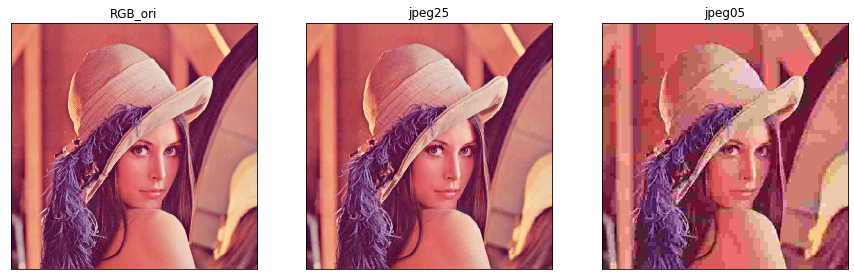

In [15]:
# Estude bem este código e Execute 
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt 

bgr = cv.imread('lena.bmp')  # formato BGR
#bgr = cv.imread('peppers.png')  # formato BGR

# Salva o arquivo com menor qualidade, neste caso fator 25 e fator 5
cv.imwrite('jpeg25.jpg', bgr, [cv.IMWRITE_JPEG_QUALITY, 25])
cv.imwrite('jpeg05.jpg', bgr, [cv.IMWRITE_JPEG_QUALITY, 5])

# Leitura dos arquivos salvos
bgr25 = cv.imread('jpeg25.jpg')
bgr05 = cv.imread('jpeg05.jpg')

# Apresentação do resultado na tela
cv.imshow('RGB_ori',bgr)
cv.imshow('JPEG_25',bgr25)
cv.imshow('JPEG_05',bgr05)

k = cv.waitKey(0)

if k == 27:         
    cv.destroyAllWindows()

# Converte o resultado para RGB para plotar
rgb1 = cv.cvtColor(bgr, cv.COLOR_BGR2RGB)
rgb25 = cv.cvtColor(bgr25, cv.COLOR_BGR2RGB)
rgb05 = cv.cvtColor(bgr05, cv.COLOR_BGR2RGB)

plt.figure(figsize=(15, 6))
plt.subplot(131);plt.imshow(rgb1); plt.title('RGB_ori'); plt.xticks([]), plt.yticks([]) 
plt.subplot(132);plt.imshow(rgb25); plt.title('jpeg25'); plt.xticks([]), plt.yticks([]) 
plt.subplot(133);plt.imshow(rgb05); plt.title('jpeg05'); plt.xticks([]), plt.yticks([]) 
plt.show()


In [16]:
# 1) Tamanho dos arquivos:
print(f'Dimensões da imagem lena: {bgr.shape}')

Dimensões da imagem lena: (512, 512, 3)


### <font color='red'>2.1 Repetindo processo com imagens Peppers e Messi:</font>


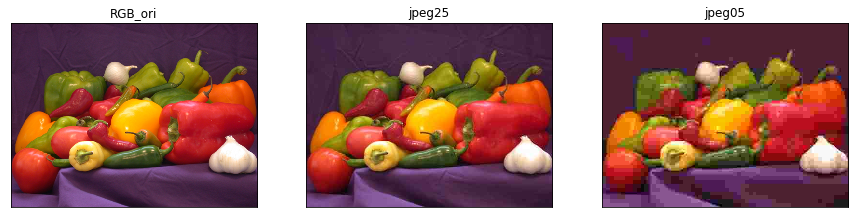

In [17]:
#bgr = cv.imread('lena.bmp')  # formato BGR
bgr = cv.imread('peppers.png')  # formato BGR

# Salva o arquivo com menor qualidade, neste caso fator 25 e fator 5
cv.imwrite('jpeg25.jpg', bgr, [cv.IMWRITE_JPEG_QUALITY, 25])
cv.imwrite('jpeg05.jpg', bgr, [cv.IMWRITE_JPEG_QUALITY, 5])

# Leitura dos arquivos salvos
bgr25 = cv.imread('jpeg25.jpg')
bgr05 = cv.imread('jpeg05.jpg')

# Apresentação do resultado na tela
cv.imshow('RGB_ori',bgr)
cv.imshow('JPEG_25',bgr25)
cv.imshow('JPEG_05',bgr05)

k = cv.waitKey(0)

if k == 27:         
    cv.destroyAllWindows()

# Converte o resultado para RGB para plotar
rgb1 = cv.cvtColor(bgr, cv.COLOR_BGR2RGB)
rgb25 = cv.cvtColor(bgr25, cv.COLOR_BGR2RGB)
rgb05 = cv.cvtColor(bgr05, cv.COLOR_BGR2RGB)

plt.figure(figsize=(15, 6))
plt.subplot(131);plt.imshow(rgb1); plt.title('RGB_ori'); plt.xticks([]), plt.yticks([]) 
plt.subplot(132);plt.imshow(rgb25); plt.title('jpeg25'); plt.xticks([]), plt.yticks([]) 
plt.subplot(133);plt.imshow(rgb05); plt.title('jpeg05'); plt.xticks([]), plt.yticks([]) 
plt.show()

In [18]:
# 1) Tamanho dos arquivos:
print(f'Dimensões da imagem peppers: {bgr.shape}')

Dimensões da imagem peppers: (384, 512, 3)


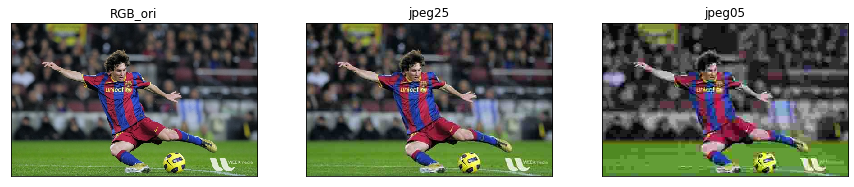

In [19]:
#bgr = cv.imread('lena.bmp')  # formato BGR
#bgr = cv.imread('peppers.png')  # formato BGR
bgr = cv.imread('messi5.jpg')  # formato BGR

# Salva o arquivo com menor qualidade, neste caso fator 25 e fator 5
cv.imwrite('jpeg25.jpg', bgr, [cv.IMWRITE_JPEG_QUALITY, 25])
cv.imwrite('jpeg05.jpg', bgr, [cv.IMWRITE_JPEG_QUALITY, 5])

# Leitura dos arquivos salvos
bgr25 = cv.imread('jpeg25.jpg')
bgr05 = cv.imread('jpeg05.jpg')

# Apresentação do resultado na tela
cv.imshow('RGB_ori',bgr)
cv.imshow('JPEG_25',bgr25)
cv.imshow('JPEG_05',bgr05)

k = cv.waitKey(0)

if k == 27:         
    cv.destroyAllWindows()

# Converte o resultado para RGB para plotar
rgb1 = cv.cvtColor(bgr, cv.COLOR_BGR2RGB)
rgb25 = cv.cvtColor(bgr25, cv.COLOR_BGR2RGB)
rgb05 = cv.cvtColor(bgr05, cv.COLOR_BGR2RGB)

plt.figure(figsize=(15, 6))
plt.subplot(131);plt.imshow(rgb1); plt.title('RGB_ori'); plt.xticks([]), plt.yticks([]) 
plt.subplot(132);plt.imshow(rgb25); plt.title('jpeg25'); plt.xticks([]), plt.yticks([]) 
plt.subplot(133);plt.imshow(rgb05); plt.title('jpeg05'); plt.xticks([]), plt.yticks([]) 
plt.show()


In [20]:
# 1) Tamanho dos arquivos:
print(f'Dimensões da imagem messi: {bgr.shape}')

Dimensões da imagem messi: (342, 548, 3)


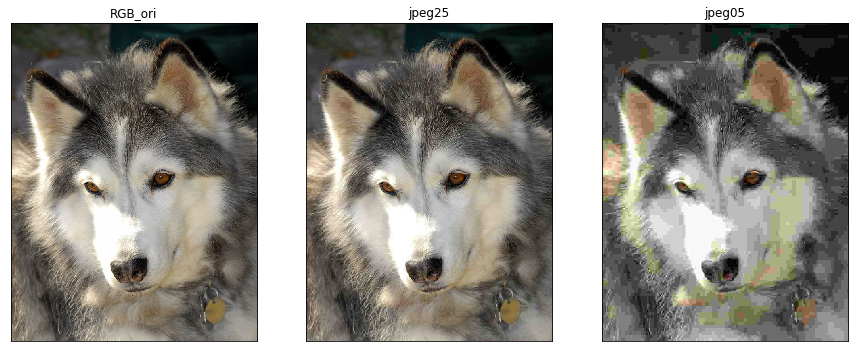

In [21]:
#bgr = cv.imread('lena.bmp')  # formato BGR
#bgr = cv.imread('peppers.png')  # formato BGR
bgr = cv.imread('husky.jpg')  # formato BGR

# Salva o arquivo com menor qualidade, neste caso fator 25 e fator 5
cv.imwrite('jpeg25.jpg', bgr, [cv.IMWRITE_JPEG_QUALITY, 25])
cv.imwrite('jpeg05.jpg', bgr, [cv.IMWRITE_JPEG_QUALITY, 5])

# Leitura dos arquivos salvos
bgr25 = cv.imread('jpeg25.jpg')
bgr05 = cv.imread('jpeg05.jpg')

# Apresentação do resultado na tela
cv.imshow('RGB_ori',bgr)
cv.imshow('JPEG_25',bgr25)
cv.imshow('JPEG_05',bgr05)

k = cv.waitKey(0)

if k == 27:         
    cv.destroyAllWindows()

# Converte o resultado para RGB para plotar
rgb1 = cv.cvtColor(bgr, cv.COLOR_BGR2RGB)
rgb25 = cv.cvtColor(bgr25, cv.COLOR_BGR2RGB)
rgb05 = cv.cvtColor(bgr05, cv.COLOR_BGR2RGB)

plt.figure(figsize=(15, 6))
plt.subplot(131);plt.imshow(rgb1); plt.title('RGB_ori'); plt.xticks([]), plt.yticks([]) 
plt.subplot(132);plt.imshow(rgb25); plt.title('jpeg25'); plt.xticks([]), plt.yticks([]) 
plt.subplot(133);plt.imshow(rgb05); plt.title('jpeg05'); plt.xticks([]), plt.yticks([]) 
plt.show()

In [22]:
filenames = ['lena.bmp', 'peppers.png', 'messi5.jpg', 'husky.jpg', 'sandstorm.jpg']
for file in filenames:
    print(file.split('.')[0])

lena
peppers
messi5
husky
sandstorm


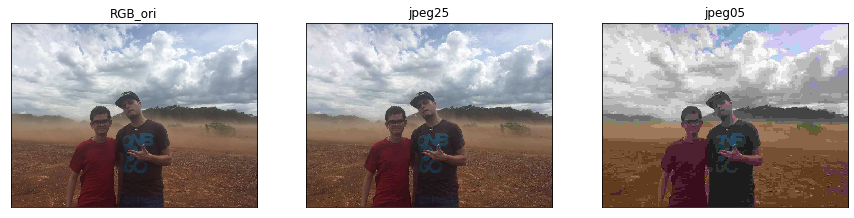

In [23]:
filenames = ['lena.bmp', 'peppers.png', 'messi5.jpg', 'husky.jpg', 'sandstorm.jpg']
for file in filenames:
    bgr = cv.imread(file)  # formato BGR

    # Salva o arquivo com menor qualidade, neste caso fator 25 e fator 5
    cv.imwrite(f'{file.split(".")[0]}_jpeg25.jpg', bgr, [cv.IMWRITE_JPEG_QUALITY, 25])
    cv.imwrite(f'{file.split(".")[0]}_jpeg05.jpg', bgr, [cv.IMWRITE_JPEG_QUALITY, 5])

# Leitura dos arquivos salvos
bgr25 = cv.imread(f'{file.split(".")[0]}_jpeg25.jpg')
bgr05 = cv.imread(f'{file.split(".")[0]}_jpeg05.jpg')

# Apresentação do resultado na tela
cv.imshow('RGB_ori',bgr)
cv.imshow('JPEG_25',bgr25)
cv.imshow('JPEG_05',bgr05)

k = cv.waitKey(0)

if k == 27:         
    cv.destroyAllWindows()

# Converte o resultado para RGB para plotar
rgb1 = cv.cvtColor(bgr, cv.COLOR_BGR2RGB)
rgb25 = cv.cvtColor(bgr25, cv.COLOR_BGR2RGB)
rgb05 = cv.cvtColor(bgr05, cv.COLOR_BGR2RGB)

plt.figure(figsize=(15, 6))
plt.subplot(131);plt.imshow(rgb1); plt.title('RGB_ori'); plt.xticks([]), plt.yticks([]) 
plt.subplot(132);plt.imshow(rgb25); plt.title('jpeg25'); plt.xticks([]), plt.yticks([]) 
plt.subplot(133);plt.imshow(rgb05); plt.title('jpeg05'); plt.xticks([]), plt.yticks([])
plt.show()

### <font color='green'>**Atividade Requerida:**</font>

* ANOTE os tamanhos dos arquivos, calcule o **FATOR DE COMPRESSÃO**, e analise sua <u>correlação</u> com a **qualidade Visual** da imagem resultante.

 - (OBS.: Para o tamanho correto de arquivos no diretorio do windows, selecione o arquivo com o botão direito do mouse e clique em "propriedades".)

* ...

* Repita a execução com outras imagens fornecidas, e também para as imagens com as fotos de todos integrantes da equipe, modificando o próprio programa acima, para leituras dos arquivos utilizados. E realize a mesma análise do fator de compressão e a qualidade visual

* Crie uma tabela para inserir todos dados deste experimento.


Calculando fator de compressão para a imagem _sandstorm.jpg_:

* Tamanho orignal (Kb): 6.836.426 Kb
* Comprimido 25 (Kb): 51.759 Kb
* Comprimido 05 (Kb): 22.444 Kb

\begin{equation}
    FC = \frac{\text{Tam. Comprimido}}{\text{Tam. Original}}
\end{equation}


\begin{equation}
    FC_{25} = \frac{\text{51.759}}{\text{6.836.426}}=0,00757106
\end{equation}

\begin{equation}
    FC_{05} = \frac{\text{22.444}}{\text{6.836.426}}=0,003283
\end{equation}

In [42]:
# Em código
tam_sandstorm_ori = 6836426
tam_sandstorm_25 = 51759
tam_sandstorm_05 = 22444

# Calculando fator de compressão
comp_25 = tam_sandstorm_25 / tam_sandstorm_ori
comp_05 = tam_sandstorm_05 / tam_sandstorm_ori

# Comunicando
print(f'Fator de Compressão 25: {comp_25:.6}')
print(f'Fator de Compressão 05: {comp_05:.6}')

Fator de Compressão 25: 0.00757106
Fator de Compressão 05: 0.003283


### <font color='red'>3. Cálculo da qualidade objetiva da compressão de imagem:</font>

* Esse código abaixo é uma continuidade do programa anterior, pois utiliza as variáveis executadas pela última vez.

* Objetivo é utilizar o método **PSNR** para mensurar a qualidade da imagem reconstruída após a compressão.

* Anote o valor obtido na tabela.

In [55]:
# esta é continuação da célula anterior

psnr1 = cv.PSNR(bgr, bgr)
psnr25 = cv.PSNR(bgr, bgr25)
psnr05 = cv.PSNR(bgr, bgr05)

print("psnr_ori= %.2f (dB)" % psnr1)
print("psnr 25 = %.2f (dB)" % psnr25)
print("psnr 05 = %.2f (dB)" % psnr05)

psnr_ori= 361.20 (dB)
psnr 25 = 35.43 (dB)
psnr 05 = 26.88 (dB)


**Função PSNR()**
Definição no OpenCV:
https://docs.opencv.org/4.1.2/d2/de8/group__core__array.html#ga3119e3ea73010a6f810bb05aa36ac8d6

* Para verificar o quão imperceptível foi a operação de compressão de imagem, utilza-se algum sistema para verificar  a similaridade ou as diferenças. O algoritmo mais comum usado para isso é o PSNR (também conhecido como relação sinal / ruído de pico). A definição mais simples começa com a média erro de esquadrão. Seja duas imagens: **I1** e **I2**; com um tamanho bidimensional iej, composto por número c de canais.
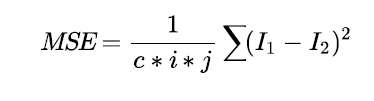

Portanto, o valor de **PSNR** é dado por:
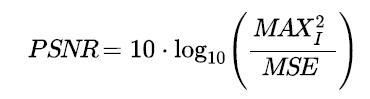


Aqui **MAX 1** é o valor máximo válido para um pixel. No caso da imagem simples de byte único por pixel por canal, é 255. Quando duas imagens são as mesmas, o MSE dará zero, resultando em uma operação inválida de divisão por zero na fórmula PSNR. Nesse caso, o PSNR é indefinido, e devemos lidar com este caso separadamente. A transição para uma escala logarítmica é feita porque os valores de pixel têm uma faixa dinâmica muito ampla.

### <font color='green'>**Atividade Requerida:**</font>

* Elabore um programa que calcula o valor de PSNR, para todas imagens utilizadas no item anterior.

* ANOTE os valores obtidos na sua tabela do fator de compressão e qualidade visual.


#### <font color='red'>4.1. Cálculo da qualidade objetiva da compressão de imagem (Outras Imagens):</font>

In [67]:
# Criando dataset
import pandas as pd

filenames = ['lena.bmp', 'peppers.png', 'messi5.jpg', 'husky.jpg', 'sandstorm.jpg']
cols = [c.split('.')[0] for c in filenames]
images_info = pd.DataFrame({})
#for col in cols:
#    images_info[col] = []

for file in filenames:
    bgr = cv.imread(file)  # formato BGR
    
    # Salva o arquivo com menor qualidade, neste caso fator 25 e fator 5
    cv.imwrite(f'{file.split(".")[0]}_jpeg25.jpg', bgr, [cv.IMWRITE_JPEG_QUALITY, 25])
    cv.imwrite(f'{file.split(".")[0]}_jpeg05.jpg', bgr, [cv.IMWRITE_JPEG_QUALITY, 5])

    # Leitura dos arquivos salvos
    bgr25 = cv.imread(f'{file.split(".")[0]}_jpeg25.jpg')
    bgr05 = cv.imread(f'{file.split(".")[0]}_jpeg05.jpg')
    
    # Cálculo psnr
    psnr1 = cv.PSNR(bgr, bgr)
    psnr25 = cv.PSNR(bgr, bgr25)
    psnr05 = cv.PSNR(bgr, bgr05)
                      
    list_psnr = [psnr1, psnr25, psnr05]
    
    # Salvando em dataset
    images_info[file.split('.')[0]] = list_psnr
                      
# Salvando csv
images_info.to_csv('psnr_images_info.csv', index=False)                      

In [66]:
images_info

lena     peppers      messi5       husky   sandstorm
0  361.201999  361.201999  361.201999  361.201999  361.201999
1   30.438202   31.031682   29.730549   31.351937   35.428438
2   24.291105   24.060389   23.919449   25.052076   26.884669

### <font color='red'>4. Obtenção da DCT num bloco 8x8 para componente Y de uma imagem:</font>

* Esse código apresenta um exemplo simples para o cálculo da Transformada Discreta de Cosseno (DCT), num bloco de 8x8 pixels de uma imagem.

* Objetivo deste experimento é comprovar a caraterística da DCT de pertimir eliminação de redundância da informação nas imagens.

In [25]:
# Estude bem este código e Execute 
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

img = cv.imread('messi5.jpg')
alt,larg,cam= img.shape

ycrcb = cv.cvtColor(img, cv.COLOR_BGR2YCrCb)
y, cr,cb = cv.split(ycrcb)

ball = y[280:340, 330:390] #
h, w = ball.shape

cx = round(w/2)
cy = round(h/2)

bloco8x8 = ball[cx-4:cx+4,cy-4:cy+4]

print("(1)")
print("Matriz 8x8: componente Y original")
print(bloco8x8)

bloco8x8f = np.float32(bloco8x8)/255.0  # conversão formato float 
dct8x8f = cv.dct(bloco8x8f)            # cálculo da DCT
dct8x8 = np.int64( (dct8x8f*255.0) )  # conversão formato inteiro 

print("(2)")
print("Imagem Y 8x8 (formato ponto flutuante)")
print( np.around(bloco8x8f, decimals = 2) )

print("(3)")
print("DCT de Y (ponto flutuante)")
print( np.around(dct8x8f, decimals = 2) )

print("(4)")
print("DCT de Y (formato inteiro)")
print(dct8x8)

(1)
Matriz 8x8: componente Y original
[[216 224 158  56  69  67  60 111]
 [212 218 101  51 137 181 195 190]
 [207 220  80  65 194 244 247 235]
 [208 215 100 126 105 197 221 195]
 [210 215 154 159  93 112 152 176]
 [198 213 213 106  96  92  83  61]
 [192 209 215 170  32  21  64  70]
 [225 195 209 220 211 117  72 152]]
(2)
Imagem Y 8x8 (formato ponto flutuante)
[[0.85 0.88 0.62 0.22 0.27 0.26 0.24 0.44]
 [0.83 0.85 0.4  0.2  0.54 0.71 0.76 0.75]
 [0.81 0.86 0.31 0.25 0.76 0.96 0.97 0.92]
 [0.82 0.84 0.39 0.49 0.41 0.77 0.87 0.76]
 [0.82 0.84 0.6  0.62 0.36 0.44 0.6  0.69]
 [0.78 0.84 0.84 0.42 0.38 0.36 0.33 0.24]
 [0.75 0.82 0.84 0.67 0.13 0.08 0.25 0.27]
 [0.88 0.76 0.82 0.86 0.83 0.46 0.28 0.6 ]]
(3)
DCT de Y (ponto flutuante)
[[ 4.81  0.76  0.76  0.05 -0.15 -0.2  -0.09 -0.07]
 [ 0.06 -0.56  0.52  0.47 -0.21 -0.24 -0.09  0.  ]
 [-0.26  0.47 -0.2  -0.19  0.18 -0.12  0.14  0.14]
 [-0.63  0.67  0.   -0.36 -0.14  0.11  0.1   0.06]
 [ 0.09  0.07 -0.05 -0.12  0.22  0.03  0.02 -0.1 ]
 [-0.27

### <font color='green'>**Atividade Requerida:**</font>

* Responda às questões.

 - Na matriz DCT obtida neste exemplo onde se localizam os coeficientes com os maiores valor absoluto? E os coeficientes com os menores valor absoluto? Complementea resposta, analisando em relação às frequências espaciais.
     - R: Nas matrizes DCT vemos que os coeficientes de maior valor absoluto estão localizados , sempre, no canto superior esquerdo das matrizes, isso ocorre pois nesses pontos a maior parte da informação é armazenada. Os menores valores absolutos encontram-se no canto inferior direito da matriz DCT. Realizando o plot da imagem da DCT vemos que os padrões bases apresentados. 

 - Numa amostragem **zig-zag** do JPEG, quais seriam os primeiros cinco termos?

  (-- Obs. não é necessário fazer programa para este item.)

In [33]:
import cv2
gray = cv2.cvtColor(dct8x8, cv2.COLOR_BGR2GRAY)
gray

error: OpenCV(4.1.1) c:\projects\opencv-python\opencv\modules\imgproc\src\color.simd_helpers.hpp:92: error: (-2:Unspecified error) in function '__cdecl cv::impl::`anonymous-namespace'::CvtHelper<struct cv::impl::`anonymous namespace'::Set<3,4,-1>,struct cv::impl::A0xe227985e::Set<1,-1,-1>,struct cv::impl::A0xe227985e::Set<0,2,5>,2>::CvtHelper(const class cv::_InputArray &,const class cv::_OutputArray &,int)'
> Invalid number of channels in input image:
>     'VScn::contains(scn)'
> where
>     'scn' is 1


## <font color='blue'><u>**Relatório da Atividade**</u></font>

### <font color='red'>Elaborar o relatório das atividades práticas, no formato HTML5:</font>

(a) Descreva todos os procedimentos realizados.

(b) Disponibilize os programas elaborados na forma de arquivo **.ipynb**, e coloque o "link" para o mesmo no relatório html5.

(c) Insira as imagens utilizadas, na forma multimídia do relatório html5.

(d) Insira a explicação falada por voz.

(e) Envie os arquivos na pasta disponibilizada.


ESCREVA AQUI A SEU PROGRAMA

In [ ]:
### INSIRA AQUI O CÓDIGO ###


### Referências
MINICHINO, J., HOWSE, J.. Learning OpenCV 3 Computer Vision with Python, 2nd Edition, Packt Publishing, 2015.

Tutorial: OpenCV-Python Tutorials https://docs.opencv.org/3.4.1/d6/d00/tutorial_py_root.html

Tutorial: Getting Started with Images https://docs.opencv.org/3.4.1/dc/d2e/tutorial_py_image_display.html

 **Color conversions:** https://docs.opencv.org/4.1.2/de/d25/imgproc_color_conversions.html 

 **YCbCr:**  https://en.wikipedia.org/wiki/YCbCr

 **Função PSNR():** 
https://docs.opencv.org/4.1.2/d2/de8/group__core__array.html#ga3119e3ea73010a6f810bb05aa36ac8d6
 
  **DCT e outras operações:** 
 https://docs.opencv.org/4.1.2/d2/de8/group__core__array.html#ga85aad4d668c01fbd64825f589e3696d4

* Insira novas referencia, caso tenha utilizado.